In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our, HMC_vanilla, Reverse_kernel
from models import Gen_network, Inf_network, Inf_network_simple, Gen_network_simple
from target import NN_bernoulli, GMM_target, NN_Gaussian
from utils import plot_digit_samples, get_samples
from args import get_args

In [2]:
torchType = torch.float32

In [3]:
def set_seeds(rand_seed):
    torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)

seed = 1 # 1337 #
set_seeds(seed)

In [4]:
args = get_args()

args.data = "mnist"
args.z_dim = 64
args.data_dim = 2
args.data_distrib = GMM_target(args, args.device)

In [5]:
if args.data == 'toy_data':
    encoder = Inf_network_simple(kwargs=args).to(args.device)
    target = NN_Gaussian(kwargs=args, model=Gen_network_simple(args.z_dim, args), device=args.device).to(args.device)   
else:
    encoder = Inf_network(kwargs=args).to(args.device)
    target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

if args.learnable_reverse:
    reverse_kernel = Reverse_kernel(kwargs=args).to(args.device)
    reverse_params = reverse_kernel.parameters()
else:
    reverse_params = list([])

if args.amortize:
    transitions = HMC_our(kwargs=args).to(args.device)
else:
    transitions = nn.ModuleList([HMC_our(kwargs=args).to(args.device) for _ in range(args['K'])])
    
if args.fix_transition_params:
    for p in transitions.parameters():
        transitions.requires_grad_(False)

params = list(encoder.parameters()) + list(target.parameters()) + list(transitions.parameters()) + list(reverse_params)
optimizer = torch.optim.Adam(params=params, lr=args.learning_rate)

In [6]:
dataset = Dataset(args, device=args.device)

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/1000 [00:00<?, ?it/s]

On batch number 1/590 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.41999999061226845 and for +1: 0.5799999870359898
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.5699999872595072 and for +1: 0.42999999038875103
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 1 	 Current ELBO: -245.35987854003906
Saved

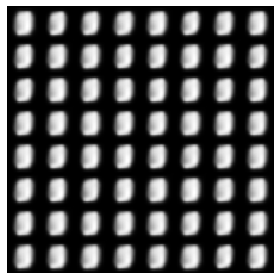

  0%|          | 1/1000 [00:12<3:35:38, 12.95s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5599999874830246 and for +1: 0.4399999901652336
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 2 	 Current ELBO: -252.6813201904297
Saved s

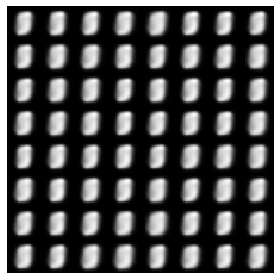

  0%|          | 2/1000 [00:25<3:35:12, 12.94s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.40999999083578587 and for +1: 0.5899999868124723
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.42999999038875103 and for +1: 0.5699999872595072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 3 	 Current ELBO: -255.76760864257812
Saved

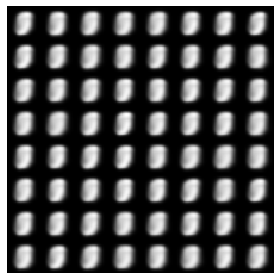

  0%|          | 3/1000 [00:38<3:34:50, 12.93s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.5999999865889549 and for +1: 0.3999999910593033
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.41999999061226845 and for +1: 0.5799999870359898
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 4 	 Current ELBO: -252.6328125
Saved sample

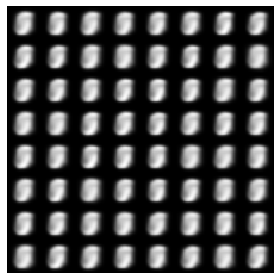

  0%|          | 4/1000 [00:51<3:34:45, 12.94s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.41999999061226845 and for +1: 0.5799999870359898
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 5 	 Current ELBO: -250.4505615234375
Save

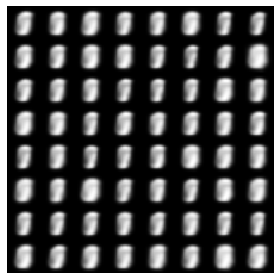

  0%|          | 5/1000 [01:04<3:34:40, 12.95s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.3999999910593033 and for +1: 0.5999999865889549
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.41999999061226845 and for +1: 0.5799999870359898
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 6 	 Current ELBO: -238.54217529296875
Saved 

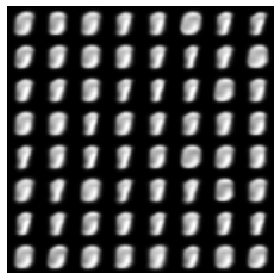

  1%|          | 6/1000 [01:17<3:34:35, 12.95s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.6399999856948853 and for +1: 0.35999999195337296
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.36999999172985554 and for +1: 0.6299999859184027
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 7 	 Current ELBO: -241.17257690429688
Sav

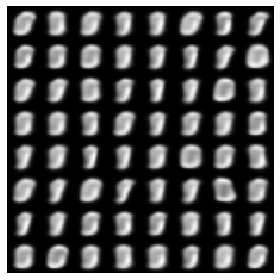

  1%|          | 7/1000 [01:30<3:34:28, 12.96s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.5899999868124723 and for +1: 0.40999999083578587
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.40999999083578587 and for +1: 0.5899999868124723
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.5199999883770943 and for +1: 0.47999998927116394
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 8 	 Current ELBO: -247.4140167236328
Save

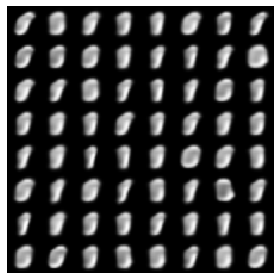

  1%|          | 8/1000 [01:43<3:34:19, 12.96s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.3499999921768904 and for +1: 0.6499999854713678
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.40999999083578587 and for +1: 0.5899999868124723
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4399999901652336 and for +1: 0.5599999874830246
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 9 	 Current ELBO: -229.48716735839844
Saved s

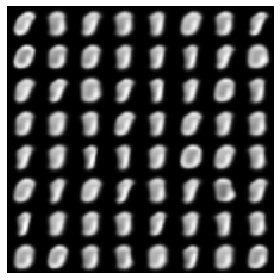

  1%|          | 9/1000 [01:56<3:34:14, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.42999999038875103 and for +1: 0.5699999872595072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 10 	 Current ELBO: -234.9734344482422
Saved

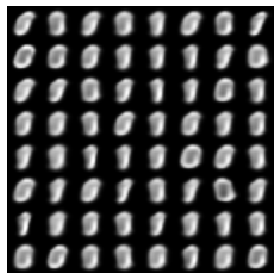

  1%|          | 10/1000 [02:09<3:34:00, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.4399999901652336 and for +1: 0.5599999874830246
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4399999901652336 and for +1: 0.5599999874830246
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 11 	 Current ELBO: -237.68760681152344
Saved 

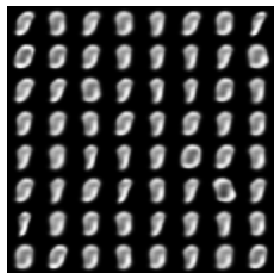

  1%|          | 11/1000 [02:22<3:33:55, 12.98s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.5699999872595072 and for +1: 0.42999999038875103
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 12 	 Current ELBO: -235.16749572753906
Sav

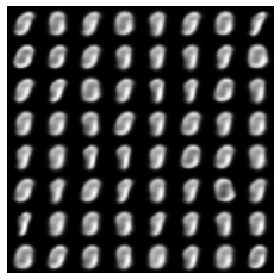

  1%|          | 12/1000 [02:35<3:33:38, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.36999999172985554 and for +1: 0.6299999859184027
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4399999901652336 and for +1: 0.5599999874830246
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.42999999038875103 and for +1: 0.5699999872595072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 13 	 Current ELBO: -230.40794372558594
Saved

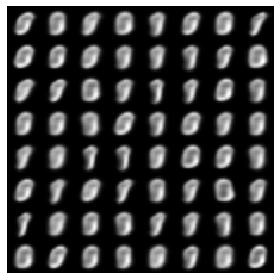

  1%|▏         | 13/1000 [02:48<3:33:21, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5199999883770943 and for +1: 0.47999998927116394
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 14 	 Current ELBO: -228.25547790527344
Save

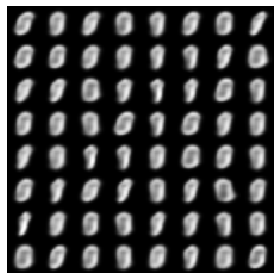

  1%|▏         | 14/1000 [03:01<3:33:05, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.3999999910593033 and for +1: 0.5999999865889549
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.40999999083578587 and for +1: 0.5899999868124723
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 15 	 Current ELBO: -230.43878173828125
Sa

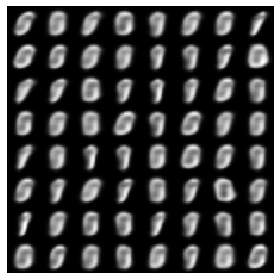

  2%|▏         | 15/1000 [03:14<3:32:51, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.5899999868124723 and for +1: 0.40999999083578587
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4399999901652336 and for +1: 0.5599999874830246
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 16 	 Current ELBO: -224.95166015625
Saved sa

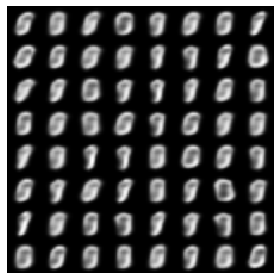

  2%|▏         | 16/1000 [03:27<3:32:38, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.4399999901652336 and for +1: 0.5599999874830246
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.5599999874830246 and for +1: 0.4399999901652336
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.3999999910593033 and for +1: 0.5999999865889549
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 17 	 Current ELBO: -231.2156524658203
Saved 

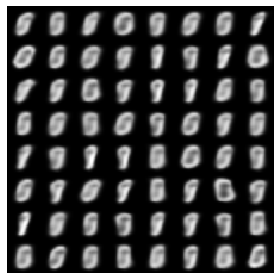

  2%|▏         | 17/1000 [03:40<3:32:24, 12.96s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 18 	 Current ELBO: -225.74191284179688
Saved 

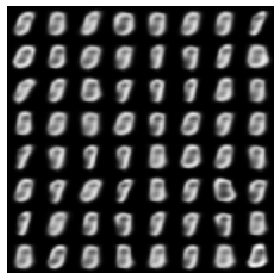

  2%|▏         | 18/1000 [03:53<3:32:11, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.5199999883770943 and for +1: 0.47999998927116394
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 201/590 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 301/590 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 401/590 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 501/590 and on k = 1 we have for  0: 0.3999999910593033 and for +1: 0.5999999865889549
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 19 	 Current ELBO: -222.77308654785156
Saved 

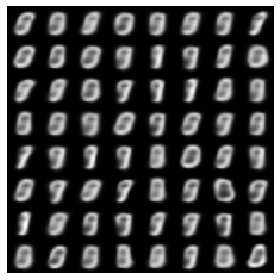

  2%|▏         | 19/1000 [04:06<3:31:58, 12.97s/it]

On batch number 1/590 and on k = 1 we have for  0: 0.5599999874830246 and for +1: 0.4399999901652336
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 101/590 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
Stepsize 0.09999999680245637
Autoregression coeff 0.5


In [ ]:
print_info_ = 1
torch_log_2 = torch.tensor(np.log(2.), device=args.device, dtype=args.torchType)


def compute_loss(z_new, p_new, u, p_old, x, sum_log_alpha, sum_log_jac, sum_log_sigma, mu=None, all_directions=None):
    if args.learnable_reverse:
        log_r = reverse_kernel(z_fin=z_new.detach(), mu=mu.detach(), a=all_directions)
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma + sum_log_alpha
    else:
        log_r = 0 #-args.K * torch_log_2
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma # + sum_log_alpha
    log_p = target.get_logdensity(z=z_new, x=x) + args.std_normal.log_prob(p_new).sum(1)
    elbo_full = log_p + log_r - log_m
    grad_elbo = torch.mean(elbo_full + elbo_full.detach() * sum_log_alpha)
    return elbo_full, grad_elbo
  
# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches
        plt.close()
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        p_old = args.std_normal.sample(z.shape)
        
        cond_vectors = [args.std_normal.sample(p_old.shape) for k in range(args.K)]

        sum_log_alpha = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for grad log alpha accumulation
        sum_log_jacobian = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for log_jacobian accumulation
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        p = p_old
        if args.learnable_reverse:
            all_directions = torch.tensor([], device=args.device)
        else:
            all_directions = None
        for k in range(args.K):
            # sample alpha - transition probabilities 
            if args.amortize:
#                 pdb.set_trace()
                z, p, log_jac, current_log_alphas, directions, _ = transitions.make_transition(q_old=z, x=batch_train,
                                                    p_old=p, k=cond_vectors[k], target_distr=target)
            else:
                z, p, log_jac, current_log_alphas, directions, _ = transitions[k].make_transition(q_old=z, x=batch_train,
                                                                    p_old=p, k=cond_vectors[k], target_distr=target) # sample a_i -- directions
            if ep  % print_info_ == 0 and b_num % (100 * print_info_) == 0:
                print('On batch number {}/{} and on k = {} we have for  0: {} and for +1: {}'.format(b_num + 1,
                                                                        dataset.train.shape[0] // args['train_batch_size'],
                                                                           k + 1,
                                                    (directions==0.).to(float).mean(),
                                                                    (directions==1.).to(float).mean()))
                if args.amortize:
                    print('Stepsize {}'.format(np.exp(transitions.gamma.cpu().detach().item())))
                    print('Autoregression coeff {}'.format(torch.sigmoid(transitions.alpha_logit).cpu().detach().item()))
            if args.learnable_reverse:
                all_directions = torch.cat([all_directions, directions.view(-1, 1)], dim=1)
            # Accumulate alphas
            sum_log_alpha = sum_log_alpha + current_log_alphas
            sum_log_jacobian = sum_log_jacobian + log_jac  # refresh log jacobian

        elbo_full, grad_elbo = compute_loss(z_new=z, p_new=p, u=u, p_old=p_old, x=batch_train, sum_log_alpha=sum_log_alpha,
                                            sum_log_jac=sum_log_jacobian, sum_log_sigma=sum_log_sigma, mu=mu, all_directions=all_directions)
    #     pdb.set_trace()
        (-grad_elbo).backward()
        if args.clip_norm:
            torch.nn.utils.clip_grad_norm_(itertools.chain(*params), args.clip_value)
        optimizer.step()
        optimizer.zero_grad()
        # Bias squared
    if ep % print_info_ == 0:
        print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo_full.detach().mean().item())
        plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)

In [ ]:
print('a')

In [ ]:
elbo_full.mean()

In [ ]:
print(args.learnable_reverse)

## Vanilla VAE

In [ ]:
dataset = Dataset(args, device=args.device)

In [ ]:
if args.data == 'toy_data':
    encoder = Inf_network_simple(kwargs=args).to(args.device)
    target = NN_Gaussian(kwargs=args, model=Gen_network_simple(args.z_dim, args), device=args.device).to(args.device)   
else:
    encoder = Inf_network(kwargs=args).to(args.device)
    target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

params = [encoder.parameters(), target.parameters()]
optimizer = torch.optim.Adam(params=itertools.chain(*params), lr=args.learning_rate)

In [ ]:
print_info_ = 10

# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches
        plt.close()
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        
        mu_dec, sigma_dec = target.decoder(z)
        if args.data == 'toy_data':
            log_numenator = torch.distributions.Normal(loc=mu_dec, scale=sigma_dec).log_prob(batch_train).sum(1) + args.std_normal.log_prob(z).sum(1)
        else:
            log_numenator = torch.distributions.Bernoulli(logits=mu_dec).log_prob(batch_train).sum([1, 2, 3]) + args.std_normal.log_prob(z).sum(1)
        log_denumenator = -torch.sum(torch.log(sigma), 1) + args.std_normal.log_prob(u).sum(1)
        elbo = torch.mean(log_numenator - log_denumenator)
        (-elbo).backward()

        optimizer.step()
        optimizer.zero_grad()
    if ep % print_info_ == 0:
        if args.data == 'toy_data':
            print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo.detach().mean().item())
            print('Mean abs mu0:', torch.mean(torch.abs(mu_dec[:, 0])).cpu().detach().numpy())
            print('Mean sigma', torch.mean(sigma).cpu().detach().numpy())
            print('Max sigma', torch.max(sigma).cpu().detach().numpy())
            print('Min sigma', torch.min(sigma).cpu().detach().numpy())
            plt.scatter(batch_train.cpu().detach().numpy()[:, 0], batch_train.cpu().detach().numpy()[:, 1], label='Data')
            plt.scatter(mu_dec.cpu().detach().numpy()[:, 0], mu_dec.cpu().detach().numpy()[:, 1], label='Reconstructed')
            plt.legend()
            plt.show()
        else:
            plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)